<a href="https://colab.research.google.com/github/DRRguez/DRRguez/blob/main/session2_20_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heading1

## Heading2

##### Heading5

Este es un texto en negritas **bold**, este texto está 
en cursivas *italic*.

Este es un salto de linea.

Podemos agregar listas
* elemento 1
* elemento 2

También podemos escribir formulas

$$
g(x)=\int ^m _n x^2 dx
$$


In [1]:
print('Hello World!')

Hello World!


In [ ]:
!cat /proc/meminfo

In [13]:
a=25
b=67
c=a+b

In [21]:
print('a='+str(a)+', b='+str(b)+', c='+str(c))

a=25, b=67, c=92


In [24]:
print('a={}, b={}'.format(a,b))

a=25, b=67


# Modules

Aqui cargamos los modulos

In [83]:
import numpy as np
import matplotlib.pyplot as plt

import math

from scipy.stats import wrapcauchy

import plotly.graph_objects as go

# CLASES

In [60]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Brownian Motion 1-D

Generar una trayectoria de tipo Browniana de una dimensión haciendo uso del método Wiener.

In [ ]:
#Ejemplo de uso
np.ones(shape=(10,5))

In [30]:
s_pos = 0
n_steps = 10000

#Brownian Walking vector.
bw = np.ones(n_steps)*s_pos

In [ ]:
#Ejemplo de uso
np.random.choice([1,-1], p=[0.2, 0.8])

In [31]:
#Generate trajectory
for i in range(1,n_steps):
  #Sampling from an uniform distribution
  di = np.random.choice([1,-1])
  #Winer process
  bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

In [ ]:
# Ejemplo de uso
np.linspace(0,1,10)

<function matplotlib.pyplot.show(*args, **kw)>

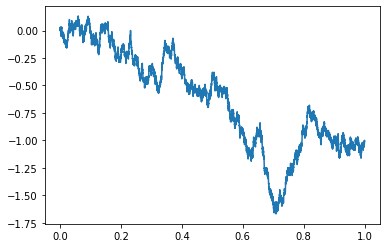

In [35]:
# times aux
times = np.linspace(0, 1, n_steps)

# Graficar con pyplot
plt.plot(times, bw)
plt.show

## Implementación alternativa Brownian Motion

Implementación más fácil de escalar.

In [ ]:
#Ejemplo de uso
db = np.random.choice([1,-1], size=10000)*1/np.sqrt(10000)
np.cumsum(db)

In [57]:
# init parameters
n = 10000

# Warning
if n < 30:
  print('Warning! The number of steps is too small')

# Vector with displacements
dB = np.random.choice([1,-1], size=n-1)*1/np.sqrt(n)

# Init Brownian Walker
bw = np.zeros(shape=(1,))

# Generate trajectory by accumulation displacement
bw = np.concatenate((bw,np.cumsum(dB)))

<function matplotlib.pyplot.show(*args, **kw)>

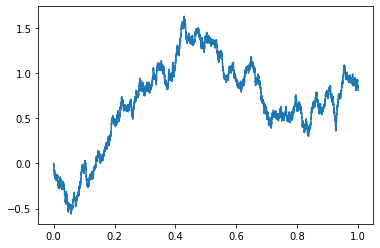

In [58]:
#Plot Brownian trajectory
times = np.linspace(0,1,n)

plt.plot(times,bw)
plt.show

## Brownian motion 2D with vectors

In [ ]:
#Ejemplo de uso
m = Vec2d(3, 0)
print(m.x)
m=m.rotated(np.pi/2)
print(m.x)

In [110]:
# init variables
n_steps = 10000
s_pos = 0
speed = 6

# init velocity vector
velocity = Vec2d(speed, 0)

# Matriz para Brownian Walker
BM_2d = np.ones(shape=(n_steps,2))*s_pos

for i in range(1, n_steps):
  turn_angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
  velocity = velocity.rotated(turn_angle)

  BM_2d[i,0]=BM_2d[i-1,0]+velocity.x
  BM_2d[i,1]=BM_2d[i-1,1]+velocity.y

<function matplotlib.pyplot.show(*args, **kw)>

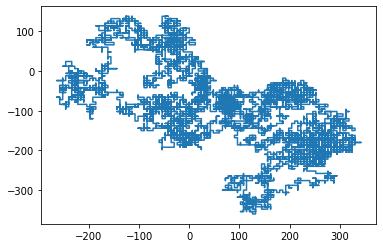

In [111]:
# Plot Brownian 2d trajectory
plt.plot(BM_2d[:,0], BM_2d[:,1])
plt.show

## Wraped Cauchy Distribution

In [107]:
CRW_exponent = 0.7

# resolution
resolution = 200
aux_domain = np.linspace(0, 2*np.pi, resolution)

wrapcauchy_pdf = np.array([wrapcauchy.pdf(i, CRW_exponent) for i in aux_domain])

In [108]:
# Init figure
fig_wrapcauchy_pdf = go.Figure()

# fig_wrapcauchy_pdf.add_trace(go.Scatter(x= aux_domain,
#                                         y = wrapcauchy_pdf,
#                                         marker = dict(size=2),
#                                         line = dict(width=2),
#                                         mode = 'lines',
#                                         name = ' cauchy_0.7',
#                                         showlegend = True
#                                         ))

aux_plot=np.linspace(-np.pi,np.pi,resolution)

plot_wrapcauchy_pdf = np.concatenate((wrapcauchy_pdf[int(resolution/2):resolution],wrapcauchy_pdf[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter(x= aux_plot,
                                        y = plot_wrapcauchy_pdf,
                                        marker = dict(size=2),
                                        line = dict(width=2),
                                        mode = 'lines',
                                        name = ' cauchy_0.7',
                                        showlegend = True
                                        ))

fig_wrapcauchy_pdf.show()

In [112]:
# Init figure
fig_BM_2d = go.Figure();

# plot trajectory
fig_BM_2d.add_trace(go.Scatter(x= BM_2d[:,0],
                              y = BM_2d[:,1],
                              marker = dict(size=2),
                              line = dict(width=2),
                              mode = 'lines',
                              name = ' BM_2d',
                              showlegend = True))

fig_BM_2d.show()

In [116]:
# time aux vector
times = np.linspace(0,1, n_steps)

#init figure
fig_BM_3d = go.Figure()

#plot trajectory
fig_BM_3d.add_trace(go.Scatter3d(x= BM_2d[:,0],
                              y = BM_2d[:,1],
                              z = times,
                              marker = dict(size=2),
                              line = dict(width=2),
                              mode = 'lines',
                              name = ' BM_3d',
                              showlegend = True
                               ))

# figure parameters -- update layout
fig_BM_3d.update_layout(title_text = 'BM trajectory in 3D',
                        autosize = False,
                        width = 800,
                        height = 800,
                        scene_camera = dict(
                            up=dict(x=0, y=1, z=0),
                            center = dict(x=0, y=0, z=0),
                            eye=dict(x=0,y=0,z=1)),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='time',nticks=20),
                        )
                        )

fig_BM_3d.show()